In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("telco_customer_churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleansing

**Check missing values**

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Check Outlier**

In [5]:
# Check data type
df = df[~(df["TotalCharges"] == " ")]
df["TotalCharges"] = df["TotalCharges"].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [6]:
df_num = df.select_dtypes(["float64", "int64"])
col_num = df_num.columns
col_num  

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [7]:
for col in col_num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    print(f"\nIQR for {col}= {iqr}")

    fence_high = q3 +1.5*iqr
    fence_low = q1 - 1.5*iqr

    outliers = df[(df[col] > fence_high) | (df[col] < fence_low)]
    df = df[(df[col] >= fence_low) & (df[col] <= fence_high)]
    print(outliers.shape) 


IQR for SeniorCitizen= 0.0
(1142, 21)

IQR for tenure= 46.0
(0, 21)

IQR for MonthlyCharges= 61.18749999999999
(0, 21)

IQR for TotalCharges= 3200.7875000000004
(19, 21)


In [8]:
df.shape

(5871, 21)

**Check Duplicate**

In [9]:
df.duplicated().sum()

0

In [10]:
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5871 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5871 non-null   object 
 1   gender            5871 non-null   object 
 2   SeniorCitizen     5871 non-null   int64  
 3   Partner           5871 non-null   object 
 4   Dependents        5871 non-null   object 
 5   tenure            5871 non-null   int64  
 6   PhoneService      5871 non-null   object 
 7   MultipleLines     5871 non-null   object 
 8   InternetService   5871 non-null   object 
 9   OnlineSecurity    5871 non-null   object 
 10  OnlineBackup      5871 non-null   object 
 11  DeviceProtection  5871 non-null   object 
 12  TechSupport       5871 non-null   object 
 13  StreamingTV       5871 non-null   object 
 14  StreamingMovies   5871 non-null   object 
 15  Contract          5871 non-null   object 
 16  PaperlessBilling  5871 non-null   object 
 17  

## EDA

**Univariate Analysis**

In [11]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5871.0,5871.000000,5871.000000,5871.000000
mean,0.0,32.123999,61.709036,2160.603338
std,0.0,24.548335,30.204923,2207.544777
min,0.0,1.000000,18.250000,18.800000
25%,0.0,9.000000,25.550000,362.675000
50%,0.0,28.000000,65.650000,1286.000000
75%,0.0,55.000000,86.500000,3536.425000
max,0.0,72.000000,118.600000,8349.700000


Dilihat dari std dan mean
- tenure = nilainya cukup tersebar
- MonthlyCharges = tidak terlalu tersebar 
- TotalCharges = sangat tersebar 

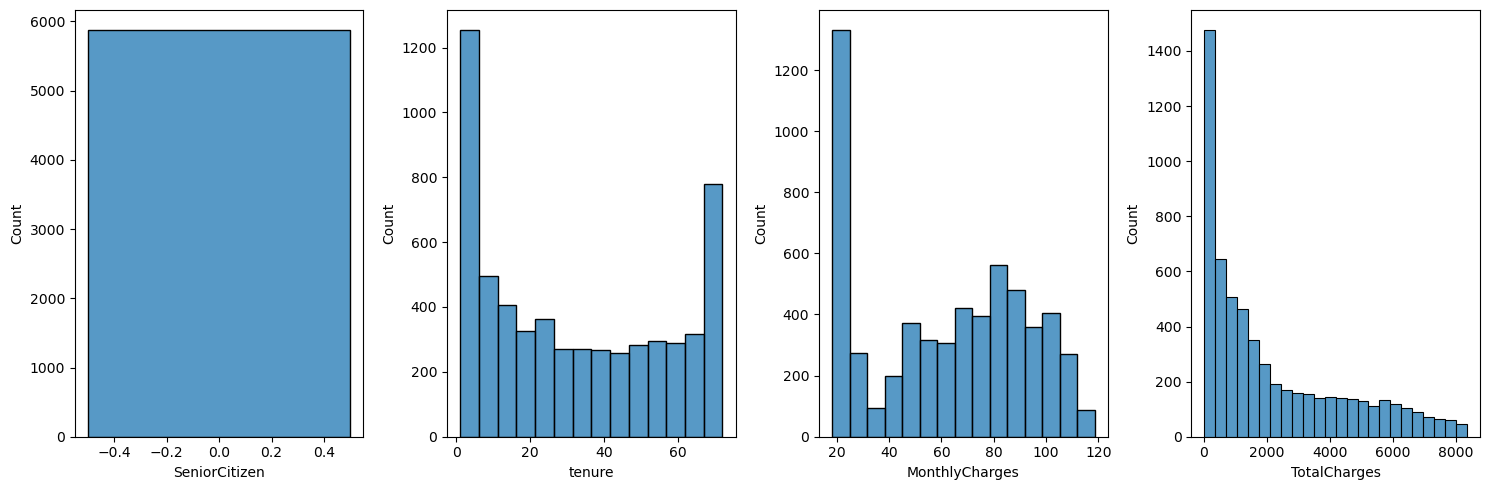

In [13]:
plt.figure(figsize=(15,5))
for i in range(len(col_num)):
    plt.subplot(1, 4, i+1)
    sns.histplot(x=col_num[i], data=df_clean)
    plt.tight_layout()

- SeniorCitizen = uniform, tersebar rata
- tenure = skew ke kanan
- MonthlyCharges = hampir distribusi normal, tapi tetap skew 
- TotalCharges = skew kanan

**Multivariate Analysis**

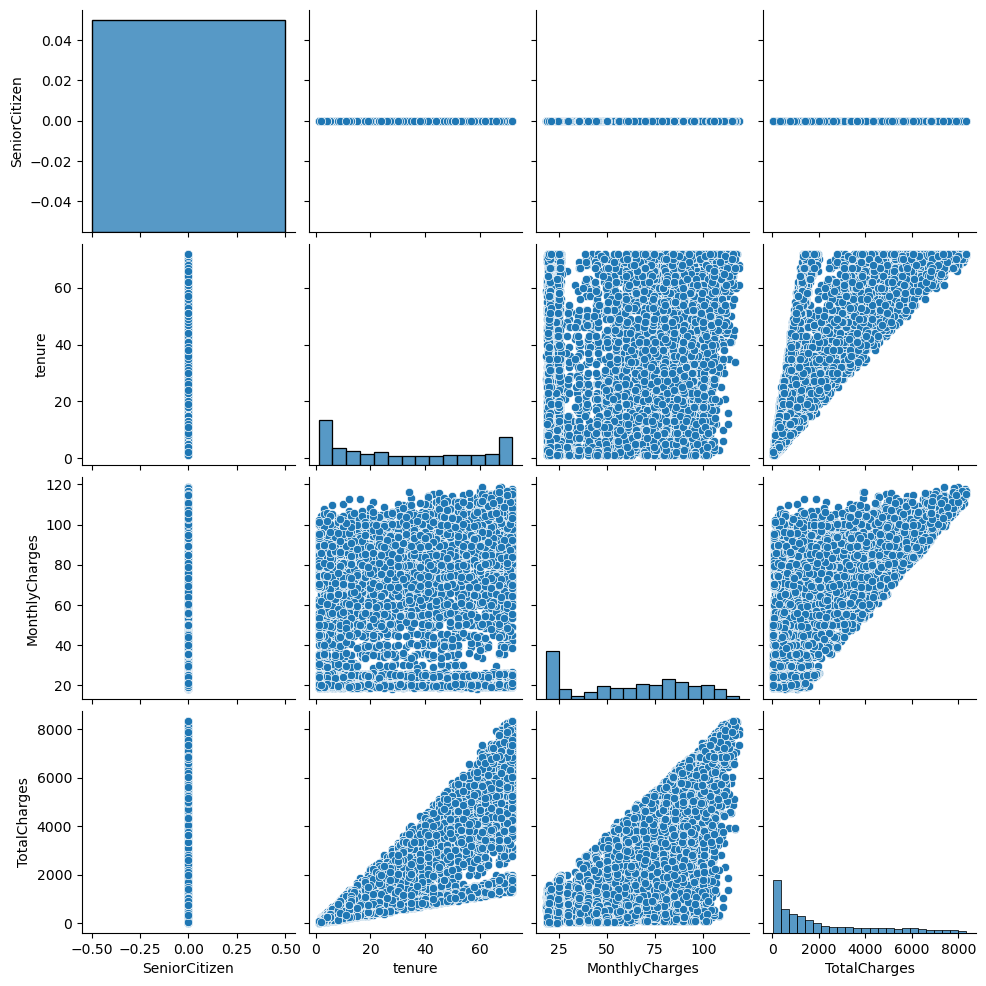

In [14]:
sns.pairplot(df_clean[col_num])

Beberapa hubungan yang linear:
- TotalCharge tinggi dan tenure makin tinggi
- MonthlyCharged dan TotalCharges

<Axes: >

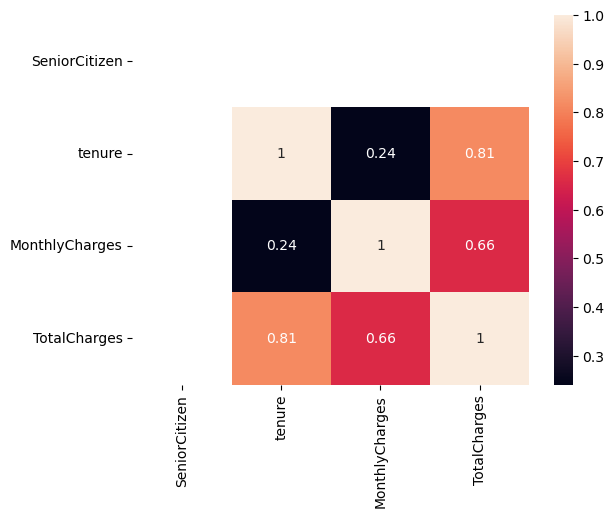

In [15]:
sns.heatmap(df_clean[col_num].corr(), annot=True)

- SeniorCitizen uniorm maka tidak punya relasi
- korelasi tinggi di 0.81, TotalCharges dan tenure